In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import keras
import tensorflow

from sklearn.model_selection import train_test_split 
from tensorflow.keras.utils import to_categorical 

from tensorflow.keras.layers import Dense ,Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.layers import Flatten, BatchNormalization

**ชุดข้อมูลสามารถดาวน์โหลดได้ที่ลิงก์นี้** [Kaggle | Fashion MNIST](https://www.kaggle.com/zalando-research/fashionmnist) 

In [0]:
# ประกาศตัวแปรเพื่อเก็บข้อมูลที่อ่านค่ามากจากไฟล์ csv
# การอ่านไฟล์ csv จะใช้ไลบรารี่ที่ชื่อ pd หรือ padda
train_df = pd.read_csv('./fashion-mnist_train.csv')
test_df = pd.read_csv('./fashion-mnist_test.csv')

#print(train_df)

In [5]:
# แสดงข้อมูลในรูปแบบตาราง (DataFrame) คล้ายกับในโปรแกรม Excel
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [0]:
# เราสามารถดูข้อมูลที่เราเก็บได้ว่าเป็นอย่างไรแต่เราไม่สามารถจัดการกับข้อมูลนั้นได้เราจึง
# แปลงข้อมูลให้เป็นข้อมูลมูลรูปแบบ array โดยใช้ np หรือ numpy
# .iloc ซึ่งหมายถึงการดึงข้อมูลจากชื่อของแถวคล้าย ๆ กับ .loc
train_data = np.array(train_df.iloc[:, 1:])
test_data = np.array(test_df.iloc[:, 1:])

# แสดงข้อมูลรูปแบบ array
# train_data
# test_data

เพิ่มเติมเกี่ยวกับ [ One-hot Encode](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/)

In [0]:
# to_categorical ทำหน้าที่เปลี่ยน Integer เป็น One-hot Encode

train_labels = to_categorical(train_df.iloc[:, 0])
test_labels = to_categorical(test_df.iloc[:, 0])

In [0]:
# ขนาดของภาพ
rows, cols = 28, 28 

# .reshape เป็นเมธอดที่จะทำการคืนอาเรย์ใหม่ที่มีขนาดมิติเท่ากับที่กำหนด
train_data = train_data.reshape(train_data.shape[0], rows, cols, 1)
test_data = test_data.reshape(test_data.shape[0], rows, cols, 1)

# แปลงชนิดข้อมูลเป็น float32
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

# ตอนนี้เราได้ชนิดข้อมูลแบบ float32 เพื่อให้เราสามารถจัดการข้อมูลได้ง่ายมากขึ้น
# train_data

train_data /= 255.0
test_data /= 255.0

In [0]:
# แบ่งชุดข้อมูลเพื่อ train และ validation
train_x, val_x, train_y, val_y = train_test_split(train_data, train_labels, test_size=0.2)

In [0]:
batch_size = 256
epochs = 5
input_shape = (rows, cols, 1)

In [0]:
# สร้างโมเดล
def baseline_model():
    model = Sequential()
    model.add(BatchNormalization(input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    return model

In [0]:
model = baseline_model()

In [0]:
# รวมโมเดล
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0

In [16]:
# ฝึกสอนโมเดล
history = model.fit(train_x, train_y,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(val_x, val_y))

Epoch 1/5
188/188 [==============================] - 52s 277ms/step - loss: 1.3280 - accuracy: 0.5317 - val_loss: 1.5515 - val_accuracy: 0.7134
Epoch 2/5
188/188 [==============================] - 52s 276ms/step - loss: 0.8488 - accuracy: 0.6906 - val_loss: 0.7921 - val_accuracy: 0.7682
Epoch 3/5
188/188 [==============================] - 52s 276ms/step - loss: 0.7379 - accuracy: 0.7298 - val_loss: 0.5746 - val_accuracy: 0.7972
Epoch 4/5
188/188 [==============================] - 52s 276ms/step - loss: 0.6787 - accuracy: 0.7487 - val_loss: 0.5072 - val_accuracy: 0.8108
Epoch 5/5
188/188 [==============================] - 51s 273ms/step - loss: 0.6368 - accuracy: 0.7680 - val_loss: 0.4764 - val_accuracy: 0.8230


In [0]:
hist = history.history

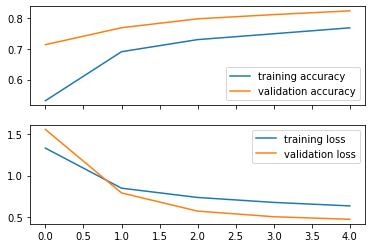

In [27]:
# แสดงผล hist ที่ได้จากการฝึกสอนให้แสดงผลในรูปแบบกราฟ
fig, ax = plt.subplots(2)

# แสดงค่าความแม่นยำ
ax[0].plot(hist['accuracy'])
ax[0].plot(hist['val_accuracy'])
ax[0].legend(['training accuracy', 'validation accuracy'])

# แสดงค่าความผิดพลาด
ax[1].plot(hist['loss'])
ax[1].plot(hist['val_loss'])
ax[1].legend(['training loss', 'validation loss'])

for axs in ax.flat:
    axs.label_outer()

In [0]:
# ทำการพยากรณ์ test_data
predict = model.predict(test_data)